<a href="https://colab.research.google.com/github/zombig816/Numerical-methods/blob/main/num_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.         0.49800797 0.66225515 0.74308291 0.79056565 0.82139953
 0.84274364 0.85818025 0.86970154 0.87850422 0.8853508  0.8907502
 0.89505499 0.89851699 0.90132069 0.90360414 0.90547243 0.90700679
 0.90827082 0.90931478 0.9101788  0.91089515 0.91148991 0.91198431
 0.9123957  0.91273829 0.91302379 0.91326185 0.91346045 0.91362619
 0.91376456 0.9138801  0.91397662 0.91405725 0.91412462 0.91418092
 0.91422797 0.9142673  0.91430017 0.91432766 0.91435063 0.91436984
 0.91438591 0.91439933 0.91441056 0.91441995 0.9144278  0.91443437
 0.91443986 0.91444445 0.91444828 0.91445149 0.91445418 0.91445642
 0.9144583  0.91445987 0.91446118 0.91446228 0.9144632  0.91446396
 0.91446461 0.91446514 0.91446559 0.91446597 0.91446628 0.91446654
 0.91446676 0.91446695 0.9144671  0.91446723 0.91446733 0.91446742
 0.9144675  0.91446756 0.91446761 0.91446766 0.9144677  0.91446773
 0.91446775 0.91446777 0.91446779 0.91446781 0.91446782 0.91446783
 0.91446784 0.91446785 0.91446785 0.91446786 0.91446786 0.91446

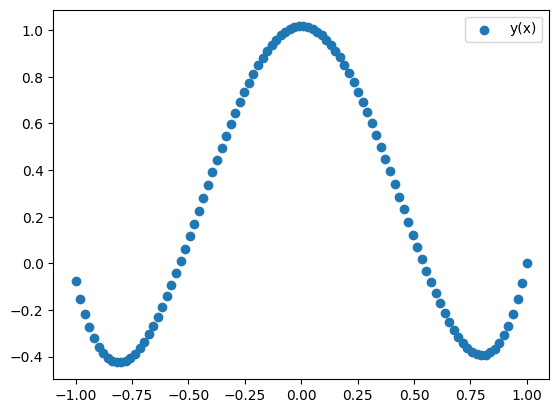

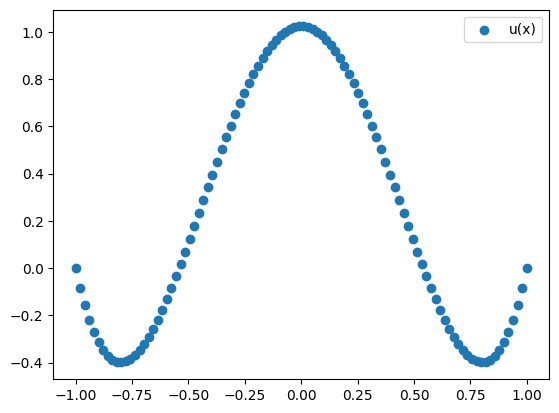

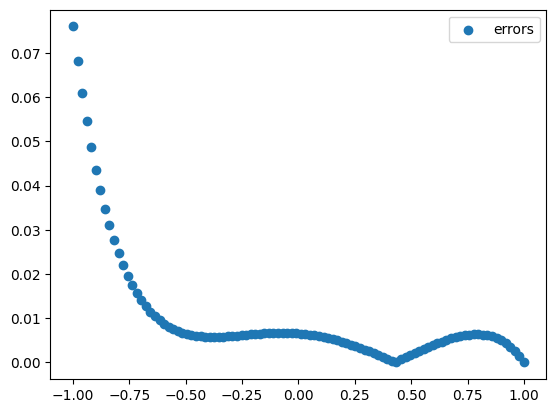

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, eps):
  return ((1/eps) + np.pi**2) * np.cos(np.pi * x)

def q(x, eps):
  return 1/eps

def u(x, eps):
  return (np.cos(np.pi * x)
   + np.exp((x - 1.0)/(eps**0.5))
    + np.exp(-(x + 1.0)/(eps**0.5)))

def progonka(a, b, N, eps, f, q, u):
  h = (b - a) / N
  ua = u(a, eps)
  ub = u(b, eps)
  x = np.linspace(a, b, N)
  A = - (1/(h**2))
  C = - (1/(h**2))
  B = (2/(h**2)) + q(x, eps)
  F = (f(x, eps))

  F[0] = ua
  F[-1] = ub

  alpha = np.zeros(N)
  betta = np.zeros(N)

  alpha[1] = (-C / B)
  betta[1] = (F[0]/B)

  for i in range(1, N-1):
    alpha[i+1] =  -(C/(B + alpha[i]*A))
    betta[i+1] =  (F[i] - A*betta[i]) / (B + A*alpha[i])


  print(alpha)
  print(betta)
  y = np.zeros(N)

  y[N-1] = (F[-1] - A*betta[-1]) / (B + A*alpha[-1])
  y[N-1] = ub
  print(len(alpha))

  for i in range(N-2, -1, -1):
    y[i] = (alpha[i+1] * y[i+1] + betta[i+1])

  return x, y

a = -1
b = 1
eps = 0.05
N = 100

x, y = progonka(a, b, N, eps, f, q, u)


ux = u(x,eps)
fig, ax = plt.subplots()
ax.scatter(x, y, label='y(x)')
plt.legend()

fig2, ax2 = plt.subplots()
ax2.scatter(x, ux, label='u(x)')
plt.legend()

fig2, ax2 = plt.subplots()
ax2.scatter(x, np.abs(ux-y), label='errors')
plt.legend()
plt.show()


